In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker


In [2]:
cancerdb = pd.read_csv('/home/blair/cognixia_workspace/cognixia/Weeks1-3/Projects/week3/Extract_Transform_Analyze_Visualize/kaggle_cancerdb.csv')

This data frame display extracts specified columns (title, tissue, geographic location, type of cancer, 
and cases recorded per year in the USA) of data from a cancer research database. The "Treatment Center/Caner Type" column names
one of two things, the treatment center or the type of cancer (note only the cancer types have values in the cases per year column). 
The "Body Tissue" column refers to the tissue within the body that is affected by the cancer. The "Geographical Location" column 
exhibits the geographic location of where the cancer center is located (note the missing locations also have an unspecified 
treatment center). The "Specific Type" column represents the type of cancer that was recorded. Lastly, the "US Cases Per Year" column 
displays the amount of cases recorded in the U.S. per year for a specified type of cancer.

In [3]:
# DATA FRAME DISPLAYING TITLE, TISSUE, LOCATION, TYPE, and US CASES PER YEAR

# created data frame and used fillna() method to replace NaN values in each column
cancerDataFrame = pd.DataFrame({
    'Treatment Center/Cancer Type:': cancerdb['title'][:30].fillna('*No Title Recorded'),
    'Body Tissue:': cancerdb['tissue'][:30].fillna('*No Tissue Type Recorded'),
    'Geographical Location:': cancerdb['city'][:30].fillna('*No Location Recorded'),
    'Specific Type:': cancerdb['mainType'][:30].fillna('*No Type Recorded'),
    'US Cases Per Year:': cancerdb['uscsCasesPerYear'][:30].fillna('*No Record')
    
})

# styled dataframe (highlight on hover)
cancerDataFrame.style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'blue')]}])

This data frame displays a combination of the "US Cases Per Year" and "Type" 
columns to exhibit the correlation of types of cancers and the statistical record
of cases per year.

In [4]:
#Combining columns cases per year and type to determine most popular types of cases
usCases_mainType = (pd.DataFrame(cancerdb, columns=['uscsCasesPerYear', 'mainType']))

# used fillna() method to replace NaN values with a specified value
mostCases = usCases_mainType[:30].fillna('*No Record')

# used rename method to rename the columns
mostCases.rename(columns={'uscsCasesPerYear': 'US Cases Per Year:', 'mainType': 'Specific Type:'}, inplace=True)

# styled dataframe (hide index and highlight on hover)
mostCases.style.hide().set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'blue')]}])



This data frame display correlates different types of cancers with the amount of cases recorded per year in the U.S. 
Upon analysis of the data provided, the conclusion can be drawn that breast cancer is the leading cancer 
diagnosis across the states followed by prostate and lung cancers. This display orders the number of cases 
per year from greateast to least allowing an individual to conveniently analyze and draw conclusions as it 
relates to the correlation between types of cancers and the amount of cases recorded per year.

In [5]:
# RETURNS US CASES PER YEAR AND TYPE OF CANCER FOR THOSE CASES IN DESCENDING ORDER

# Used lambda function checking if the case exist then return the case. Also used dropna() method to extract all NaN values.
grouped = usCases_mainType.groupby(['uscsCasesPerYear'], group_keys=False).apply(lambda cases: cases).dropna()

# renamed columns
grouped.rename(columns={'US Cases': 'Cases', 'mainType': 'Specific Type:'}, inplace=True)

# returns order max to min
max_min = grouped.sort_values(by=['uscsCasesPerYear'], ascending=False)

# styled dataframe (hide index and highlight on hover)
max_min.style.hide().set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'blue')]}])



This display retrieves statistical data from the "US Cases Per Year" column
and finds the highest (max), lowest (min), and average (avg) values.

In [6]:
# RETURNS MAX, MIN, AND AVG NUMBER OF CASES PER YEAR
counts = grouped.agg(max=('uscsCasesPerYear', 'max'),
            min=('uscsCasesPerYear', 'min'),
            avg=('uscsCasesPerYear', 'mean')
            ).round(2)
counts.rename(columns={'uscsCasesPerYear': 'US Cases Per Year:'}, inplace=True)

counts.style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'blue')]}])

This display counts the total of and shows each different type of cancer 
recorded in the database.

In [7]:
# COUNTS THE TOTAL AMOUNT OF UNIQUE TYPES OF CANCERS IN DATABASE AND DISPLAYS THE UNIQUE TYPES
totalTypes = cancerdb['mainType'].unique()
len(totalTypes)
# totalTypes.rename(columns={'0': 'Type'}, inplace=True)
print(f' There are {len(totalTypes) - 1} different types of cancers in this database. \n \n See Types Below:')
print(pd.DataFrame(totalTypes).dropna())

 There are 116 different types of cancers in this database. 
 
 See Types Below:
                                                   0
1                                 Breast Cancer, NOS
2                                   Lung Cancer, NOS
3                                   Skin Cancer, NOS
4                  Bladder/Urinary Tract Cancer, NOS
5                               Prostate Cancer, NOS
..                                               ...
112                   Primary CNS Melanocytic Tumors
113                       Renal Neuroendocrine Tumor
114                                    Sialoblastoma
115                     Tubular Adenoma of the Colon
116  Undifferentiated Embryonal Sarcoma of the Liver

[116 rows x 1 columns]


This bar chart displays the top 5 most common cancer
types in the U.S. along with the amount of cases recorded
per year. Each bar is color coordinated to represent the
ribbon color associated with the type of cancer. 

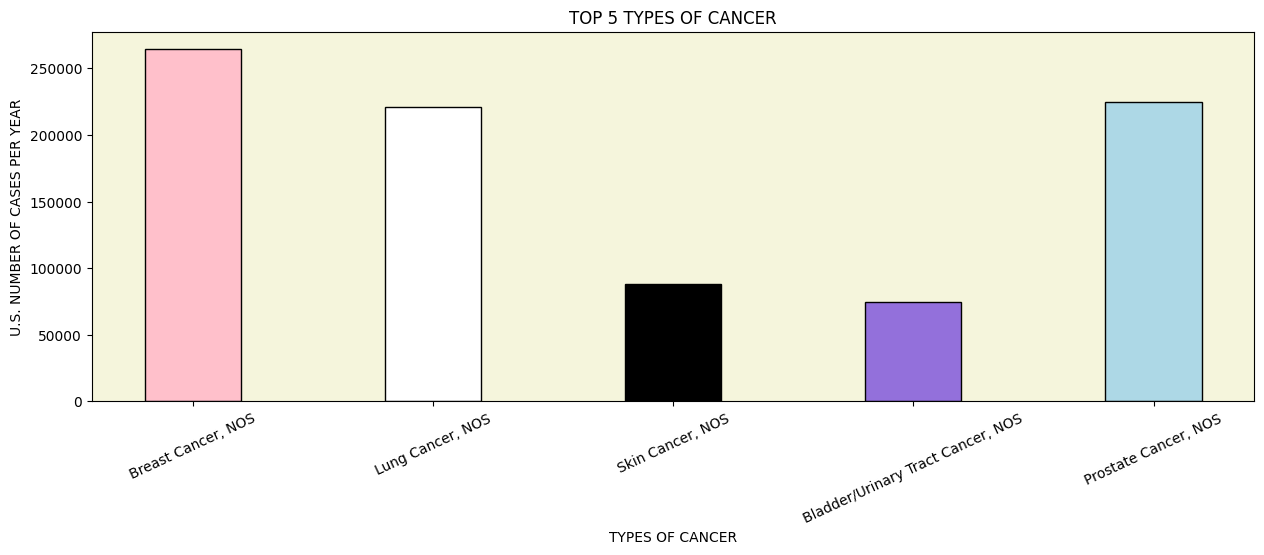

In [8]:
x = usCases_mainType['mainType'][:10].dropna()
y = grouped['uscsCasesPerYear'][:5].astype(int)
figure = plt.figure()
axes = plt.axes()

plt.bar(x, y, width=0.4, color=('pink', 'white', 'black', 'mediumpurple', 'lightblue'), edgecolor='black')
plt.title('TOP 5 TYPES OF CANCER')
axes.set_facecolor('beige')

plt.xlabel('TYPES OF CANCER')
plt.ylabel('U.S. NUMBER OF CASES PER YEAR')

plt.xticks(rotation = 25)

figure.set_figwidth(15)

# print(grouped.sort_values(by=['uscsCasesPerYear'], ascending=False)[:5])
# print(grouped['uscsCasesPerYear'][:5].astype(int))
# print(usCases_mainType['mainType'][:10].dropna())


This pie chart displays the top 5 most common cancer
types in the U.S. Each bar is color coordinated to represent the
ribbon color associated with the type of cancer. The percentages
represent the value portion of the pie for each type of cancer.

** skin cancer is typically represented by the color black but
for display purposes here it is represented by a dark grey **

Text(0.5, 1.0, 'TOP 5 TYPES OF CANCER')

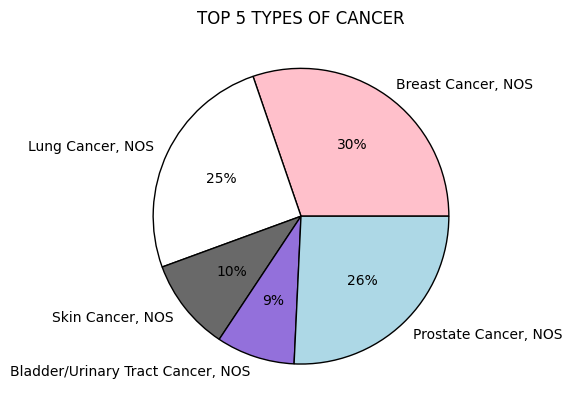

In [9]:
x = usCases_mainType['mainType'][:10].dropna()
y = grouped['uscsCasesPerYear'][:5].astype(int)
figure = plt.figure()
axes = plt.axes()

plt.pie(y, labels=x, autopct='%1.f%%', colors=('pink', 'white', 'dimgrey', 'mediumpurple', 'lightblue'), wedgeprops={'edgecolor':'black'})
plt.title('TOP 5 TYPES OF CANCER')


Text(0, 0.5, 'U.S. NUMBER OF CASES PER YEAR')

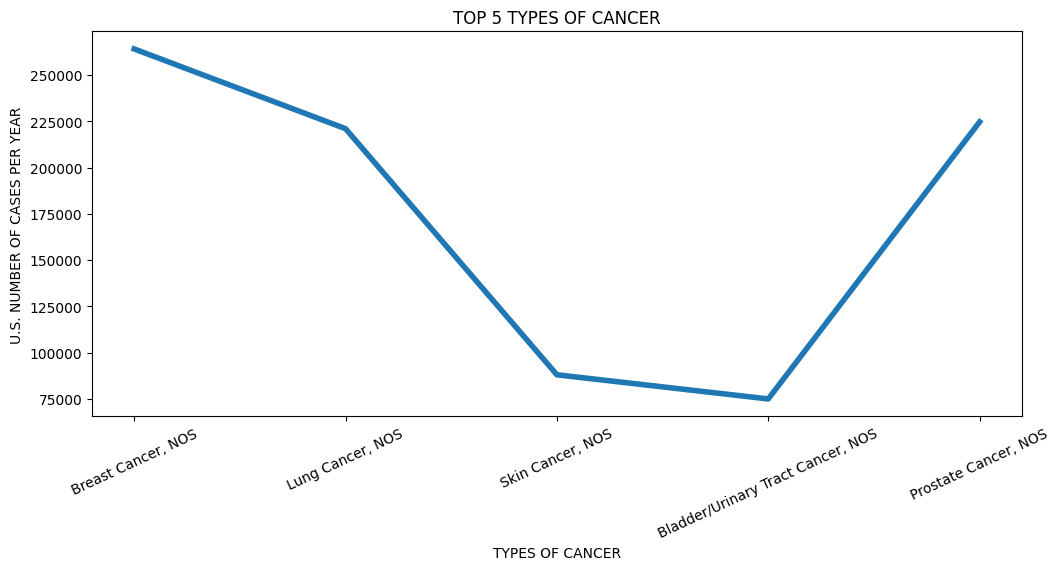

In [10]:
x = usCases_mainType['mainType'][:10].dropna()
y = grouped['uscsCasesPerYear'][:5].astype(int)
figure = plt.figure()

plt.plot(x, y, linewidth=4)
plt.xticks(rotation = 25)
plt.title('TOP 5 TYPES OF CANCER')
figure.set_figwidth(12)
figure.set_figheight(5)

plt.xlabel('TYPES OF CANCER')
plt.ylabel('U.S. NUMBER OF CASES PER YEAR')


This scatter plot chart displays the top 5 most common cancer
types in the U.S. along with the amount of cases recorded
per year. Each bar is color coordinated to represent the
ribbon color associated with the type of cancer. 


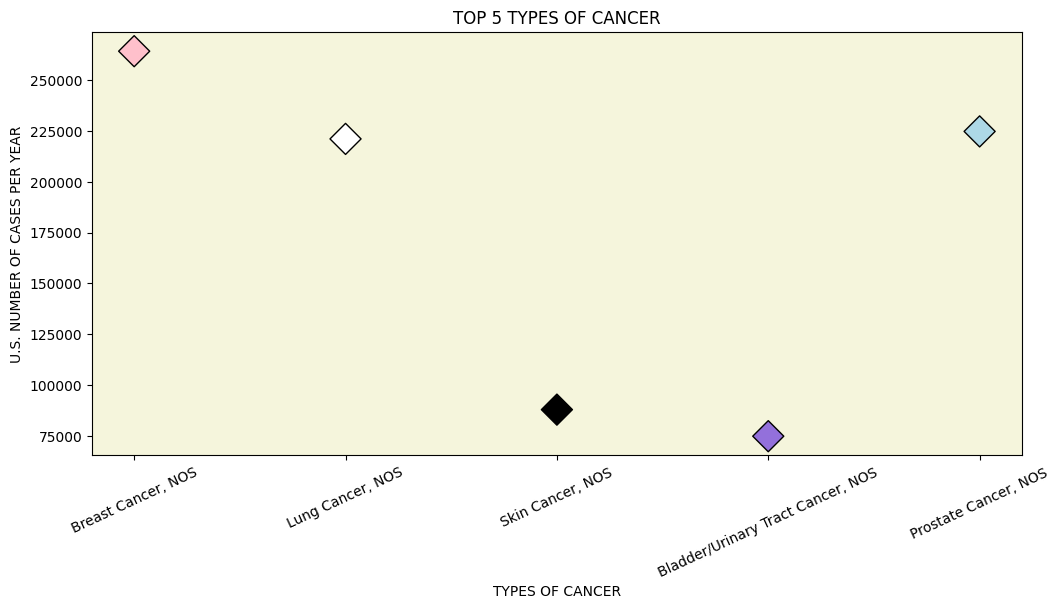

In [11]:
x = usCases_mainType['mainType'][:10].dropna()
y = grouped['uscsCasesPerYear'][:5].astype(int)
figure = plt.figure()
axes = plt.axes()
markerSize= 250

plt.scatter(x, y, color=('pink', 'white', 'black', 'mediumpurple', 'lightblue'), edgecolor='black', marker='D', s=markerSize)
plt.title('TOP 5 TYPES OF CANCER')
axes.set_facecolor('beige')

plt.xlabel('TYPES OF CANCER')
plt.ylabel('U.S. NUMBER OF CASES PER YEAR')

plt.xticks(rotation = 25)

figure.set_figwidth(12)
figure.set_figheight(5.5)